In [1]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

## Lab 9 ##

### Sample Median

In [7]:
sf = Table.read_table('san_francisco_2015.csv')
sf

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,21,"Prof & Tech Engineers - Miscellaneous, Local 21",2400,"Lab, Pharmacy & Med Techs",2481,Water Qualitytech I/II,21538,82146,0,0,82146,16942.2,12340.9,6337.73,35620.8,117767
Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,12,"Carpet, Linoleum and Soft Tile Workers, Local 12",7300,Journeyman Trade,7393,Soft Floor Coverer,5459,32165.8,973.19,848.96,33987.9,0,4587.51,2634.42,7221.93,41209.8
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",1636,Health Care Billing Clerk 2,41541,71311,5757.98,0,77069,14697.6,12424.5,6370.06,33492.2,110561
Calendar,2015,4,Community Health,DPH,Public Health,351,Municipal Executive Association - Miscellaneous,0900,Management,2620,Food Service Mgr Administrator,26718,28430.2,0,763.07,29193.3,0,4223.14,5208.51,9431.65,38625
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,8201,School Crossing Guard,45810,7948.75,0,0,7948.75,0,2873.17,616.24,3489.41,11438.2
Calendar,2015,1,Public Protection,POL,Police,911,Police Officers' Association,Q000,Police Services,Q002,Police Officer,32906,2235,0,0,2235,490.36,286.72,176.57,953.65,3188.65
Calendar,2015,4,Community Health,DPH,Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,2328,Nurse Practitioner,7506,187247,0,11704.1,198951,37683.7,12424.5,11221.7,61329.9,260281
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,253,"Transport Workers - Transit Operators, Local 250-A",9100,Street Transit,9163,Transit Operator,36773,66988.5,3512.88,2770.39,73271.8,19127.2,13203,5455.1,37785.3,111057
Calendar,2015,6,General Administration & Finance,CAT,City Attorney,311,Municipal Attorneys' Association,8100,Legal & Court,8177,Attorney (Civil/Criminal),12963,135190,0,1562.5,136752,27501.8,12424.5,10103,50029.3,186781
Calendar,2015,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",9700,Community Development,9703,Emp & Training Spec 2,35179,70474.8,147.28,1647.24,72269.3,14650.3,10696.9,5993.11,31340.3,103610


In [8]:
# Who is making the most money
sf.sort('Total Compensation', descending=True).show(5)

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,6,General Administration & Finance,RET,Retirement System,351,Municipal Executive Association - Miscellaneous,1100,Administrative & Mgmt (Unrep),1119,Chief Investment Officer,46881,507832,0,0,507832,105053,12424.5,23566.2,141044,648875
Calendar,2015,6,General Administration & Finance,ADM,General Services Agency - City Admin,164,Physicians and Dentists - Miscellaneous,2500,Med Therapy & Auxiliary,2598,Asst Med Examiner,1016,279311,3829.36,114434,397574,56211.6,12424.5,14299.1,82935.2,480509
Calendar,2015,6,General Administration & Finance,ADM,General Services Agency - City Admin,164,Physicians and Dentists - Miscellaneous,2500,Med Therapy & Auxiliary,2598,Asst Med Examiner,13746,279311,9046.92,56742.6,345101,56211.6,12424.5,13482.7,82118.8,427219
Calendar,2015,2,"Public Works, Transportation & Commerce",AIR,Airport Commission,351,Municipal Executive Association - Miscellaneous,0900,Management,0965,Dept Head V,17356,326764,0,0,326764,65806.3,12424.5,21691.2,99922.1,426686
Calendar,2015,4,Community Health,DPH,Public Health,351,Municipal Executive Association - Miscellaneous,0900,Management,1164,"Adm, SFGH Medical Center",1523,256098,0,82292.3,338390,51977.5,11468.8,20963.3,84409.6,422800


In [9]:
# Who is making the least money
sf.sort('Total Compensation', descending=False).show(5)

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,1,Public Protection,FIR,Fire Department,798,"Firefighters - Miscellaneous, Local 798",H000,Fire Services,H002,Firefighter,43833,0,0,0,0,0,0,-423.76,-423.76,-423.76
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",9900,Public Service Aide,9924,PS Aide Health Services,27871,-292.4,0,0,-292.4,0,-95.58,-22.63,-118.21,-410.61
Calendar,2015,1,Public Protection,JUV,Juvenile Probation,790,"SEIU - Miscellaneous, Local 1021",8300,Correction & Detention,8320,"Counselor, Juvenile Hall",10517,0,0,0,0,0,0,-159.12,-159.12,-159.12
Calendar,2015,6,General Administration & Finance,CPC,City Planning,21,"Prof & Tech Engineers - Miscellaneous, Local 21",1000,Information Systems,1053,IS Business Analyst-Senior,18961,0,0,0,0,0,0,-26.53,-26.53,-26.53
Calendar,2015,6,General Administration & Finance,CPC,City Planning,21,"Prof & Tech Engineers - Miscellaneous, Local 21",5200,Professional Engineering,5277,Planner 1,19387,0,0,0,0,0,0,-9.51,-9.51,-9.51


In [10]:
min_salary = 10 * 20 * 52
sf = sf.where('Total Compensation', are.above(min_salary))

In [11]:
pop_median = percentile(50, sf.column('Total Compensation'))
pop_median

107516.69

In [12]:
our_sample = sf.sample(300, with_replacement=False)
our_sample.show(5)

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,6,General Administration & Finance,CAT,City Attorney,200,"Transportation Workers, Local 200",9100,Street Transit,9157,Claims Adjuster,12670,116384,2127.18,0,118511,23422.6,12424.5,9801.87,45649,164160
Calendar,2015,1,Public Protection,FIR,Fire Department,798,"Firefighters - Miscellaneous, Local 798",H000,Fire Services,H033,"Captain, Emergency Med Svcs",23388,149742,26960.4,20652.8,197355,33124.4,14407.6,3353.78,50885.9,248241
Calendar,2015,2,"Public Works, Transportation & Commerce",PRT,Port,104,"Sheet Metal Workers, Local 104",7300,Journeyman Trade,7376,Sheet Metal Worker,17086,69969.2,0,1875.25,71844.5,15411.3,8599.9,5767.13,29778.3,101623
Calendar,2015,2,"Public Works, Transportation & Commerce",PRT,Port,21,"Prof & Tech Engineers - Miscellaneous, Local 21",4100,Property Administration,9395,"Property Manager, Port",23173,41075.4,0,0,41075.4,0,4841.37,3184.3,8025.67,49101.1
Calendar,2015,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",9700,Community Development,9703,Emp & Training Spec 2,9820,81776,0,689,82465,16996.9,12424.5,6816.38,36237.8,118703


In [13]:
percentile(50, our_sample.column('Total Compensation'))

98646.34

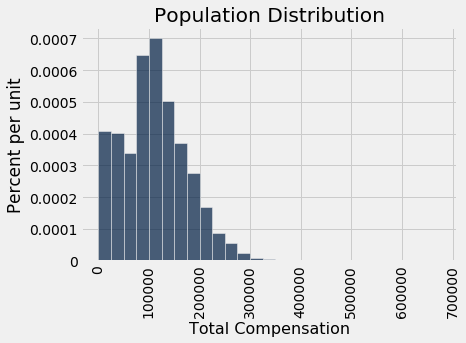

In [14]:
sf_bins = np.arange(0, 700000, 25000)
sf.hist('Total Compensation', bins=sf_bins)
plots.title('Population Distribution');

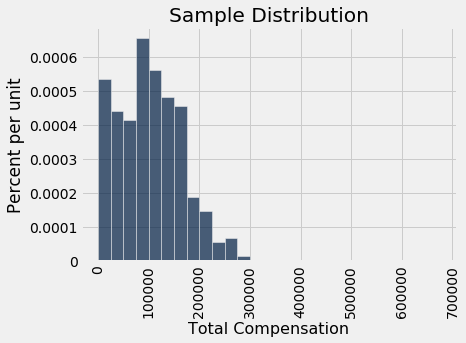

In [15]:
our_sample.hist('Total Compensation', bins=sf_bins)
plots.title('Sample Distribution');

# Variability of the Estimate

In [16]:
def generate_sample_median(samp_size):
    our_sample = sf.sample(samp_size, with_replacement=False)
    return percentile(50, our_sample.column('Total Compensation'))

In [32]:
sample_median = generate_sample_median(300)
sample_median

109547.45

In [18]:
error = our_sample_median - pop_median
error

-4418.809999999998

In [19]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = generate_sample_median(300)
    sample_medians = np.append(sample_medians, new_median)

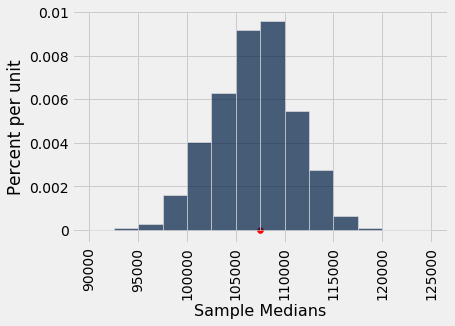

In [23]:
med_bins = np.arange(90000, 125001, 2500)
Table().with_column(
    'Sample Medians', sample_medians
).hist(bins = med_bins)

plots.scatter(pop_median, 0, color="red");

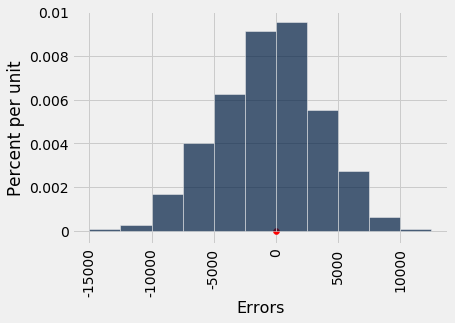

In [42]:
err_bins = np.arange(-15000, 12501, 2500)
Table().with_column(
    'Errors', sample_medians - pop_median
).hist(bins = err_bins)

plots.scatter(0, 0, color="red");

# Bootstrap

Population Median =        107516.69
Our Sample Median =        109547.45
Bootstrap Sample Median =  95732.56


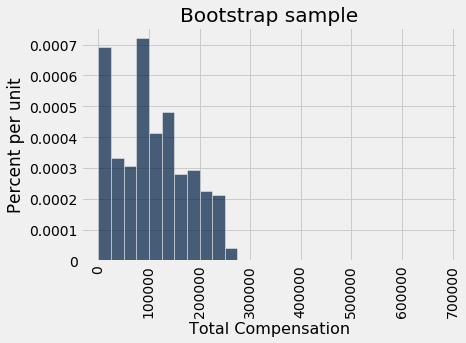

In [41]:
# Take a bootstrap (re)sample of size 300, WITH replacement
boot_sample = our_sample.sample(300, with_replacement=True)
boot_sample.hist('Total Compensation', bins=sf_bins)
plots.title('Bootstrap sample');

print("Population Median =       ", pop_median)
print("Our Sample Median =       ", sample_median)
print("Bootstrap Sample Median = ", 
      percentile(50,boot_sample.column('Total Compensation')))

In [35]:
def one_bootstrap_median():
    single_sample = our_sample.sample()
    return percentile(50, single_sample.column('Total Compensation'))

In [36]:
bootstrap_medians = make_array()
for i in np.arange(1000):
    new_median = one_bootstrap_median()
    bootstrap_medians = np.append(bootstrap_medians, new_median)

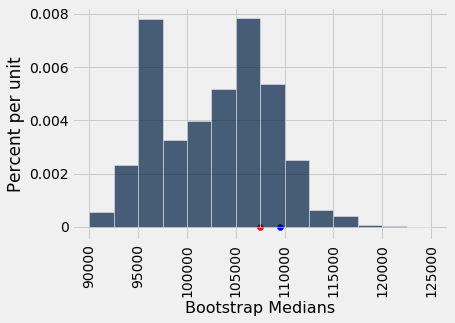

In [40]:
Table().with_column(
    'Bootstrap Medians', bootstrap_medians
).hist('Bootstrap Medians', bins=med_bins)

plots.scatter(pop_median, 0, color="red");
plots.scatter(sample_median, 0, color="blue");

## Confidence Intervals

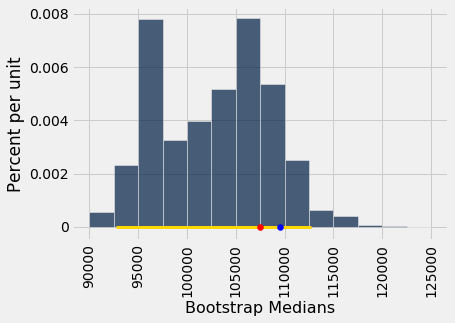

In [46]:
# Make an interval based on the middle 95% of bootstrap samples

left = percentile(2.5, bootstrap_medians)
right = percentile(97.5, bootstrap_medians)

Table().with_column(
    'Bootstrap Medians', bootstrap_medians
).hist('Bootstrap Medians', bins=med_bins)

plots.plot([left, right], [0,0], color="gold",lw=3, zorder=1);
plots.scatter(pop_median, 0, color="red", zorder=2);
plots.scatter(sample_median, 0, color="blue", zorder=2);

In [2]:
sf_pop = Table.read_table('san_francisco_2015.csv').where('Total Compensation', are.above(10000))
sf_pop = sf_pop.where('Total Compensation', are.above(10*40*52))
sf_pop.show(3)

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,21,"Prof & Tech Engineers - Miscellaneous, Local 21",2400,"Lab, Pharmacy & Med Techs",2481,Water Qualitytech I/II,21538,82146,0,0,82146,16942.2,12340.9,6337.73,35620.8,117767
Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,12,"Carpet, Linoleum and Soft Tile Workers, Local 12",7300,Journeyman Trade,7393,Soft Floor Coverer,5459,32165.8,973.19,848.96,33987.9,0,4587.51,2634.42,7221.93,41209.8
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",1636,Health Care Billing Clerk 2,41541,71311,5757.98,0,77069,14697.6,12424.5,6370.06,33492.2,110561


In [3]:
sf_pop.num_rows

35050

Population Median =  112965.15


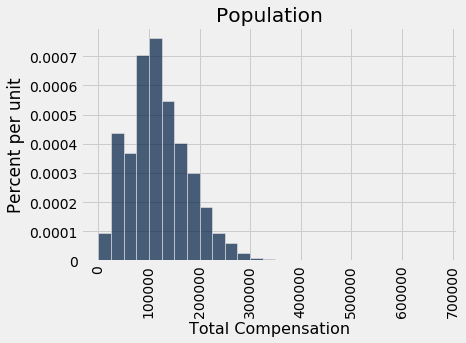

In [4]:
pop_median = percentile(50, sf_pop.column('Total Compensation'))
sf_bins = np.arange(0, 700000, 25000)
sf_pop.hist('Total Compensation', bins=sf_bins)
print("Population Median = ", pop_median)
plots.title('Population');

Population Median =  112965.15
Sample Median =  112412.86


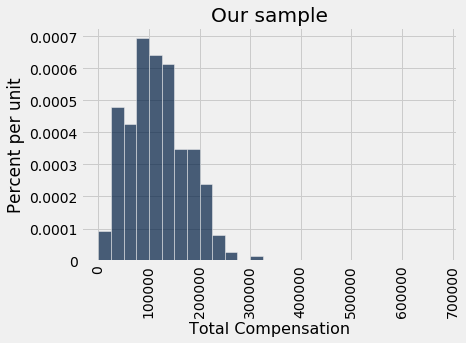

In [5]:
# Random sample of size 300
our_sample = sf_pop.sample(300, with_replacement = False)
our_sample_median = percentile(50, our_sample.column('Total Compensation'))
our_sample.hist('Total Compensation', bins=sf_bins)
print("Population Median = ", pop_median)
print("Sample Median = ", our_sample_median)
plots.title('Our sample');

In [6]:
# Empirical distribution of the sample median
# assuming we can just resample from the population
def one_sample_median():
    single_sample = sf_pop.sample(300, with_replacement = False)
    return percentile(50, single_sample.column('Total Compensation'))

medians = make_array()
for i in np.arange(1000):
    new_median = one_sample_median()
    medians = np.append(medians, new_median)

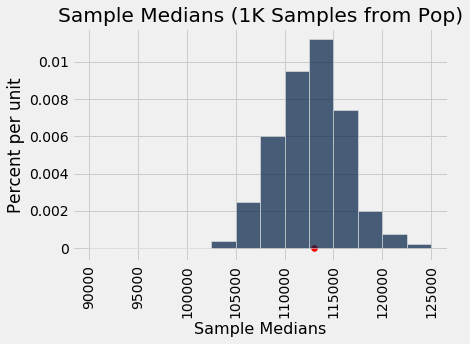

In [7]:
med_bins = np.arange(90000, 125001, 2500)

Table().with_column(
    'Sample Medians', medians
).hist('Sample Medians', bins=med_bins)

plots.scatter(pop_median, 0, color="red");
plots.title('Sample Medians (1K Samples from Pop)');

### Bootstrap

Population Median =        112965.15
Our Sample Median =        112412.86
Bootstrap Sample Median =  111612.97


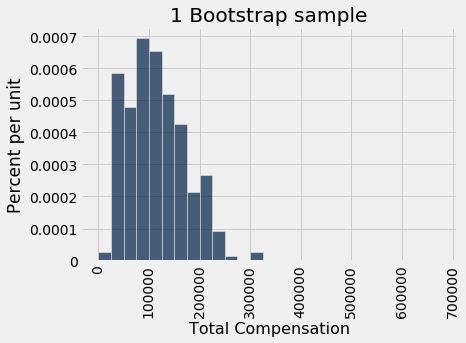

In [8]:
# Take a bootstrap (re)sample of size 300, WITH replacement
boot_sample = our_sample.sample(300, with_replacement=True)
boot_sample.hist('Total Compensation', bins=sf_bins)
plots.title('1 Bootstrap sample');

print("Population Median =       ", pop_median)
print("Our Sample Median =       ", our_sample_median)
print("Bootstrap Sample Median = ", 
      percentile(50,boot_sample.column('Total Compensation')))

In [9]:
def one_bootstrap_median():
    single_sample = our_sample.sample()
    return percentile(50, single_sample.column('Total Compensation'))

In [10]:
# Bootstrap our sample 1000 times
bootstrap_medians = make_array()
for i in np.arange(1000):
    new_median = one_bootstrap_median()
    bootstrap_medians = np.append(bootstrap_medians, new_median)

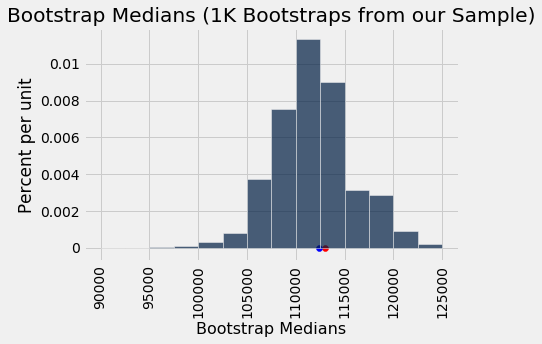

In [11]:
Table().with_column(
    'Bootstrap Medians', bootstrap_medians
).hist('Bootstrap Medians', bins=med_bins)

plots.scatter(pop_median, 0, color="red");
plots.scatter(our_sample_median, 0, color="blue");
plots.title('Bootstrap Medians (1K Bootstraps from our Sample)');

### 95% Confidence Interval

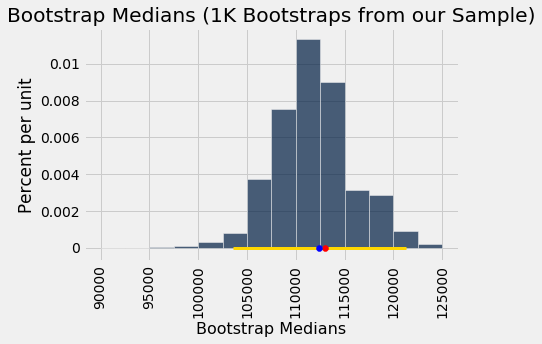

In [12]:
# Make an interval based on the middle 95% of bootstrap samples

left = percentile(2.5, bootstrap_medians)
right = percentile(97.5, bootstrap_medians)

Table().with_column(
    'Bootstrap Medians', bootstrap_medians
).hist('Bootstrap Medians', bins=med_bins)

plots.plot([left, right], [0,0], color="gold",lw=3, zorder=1);
plots.scatter(pop_median, 0, color="red", zorder=2);
plots.scatter(our_sample_median, 0, color="blue", zorder=2);
plots.title('Bootstrap Medians (1K Bootstraps from our Sample)');

## Another Example: Mean Maternal Age

In [27]:
# This time we have a sample, but no population data!
births = Table.read_table('baby.csv')
births.show(5)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False


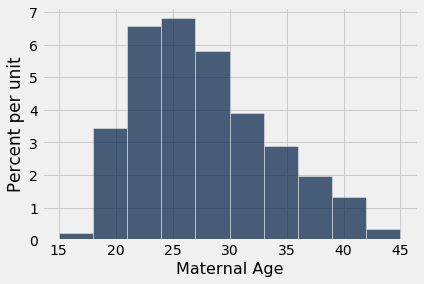

In [28]:
births.hist('Maternal Age')

In [29]:
mean_age = np.mean(births.column('Maternal Age'))
mean_age

27.228279386712096

In [30]:
def one_bootstrap_mean():
    return np.mean(births.sample().column('Maternal Age'))

In [31]:
bootstrap_means = make_array()

for i in np.arange(1000):
    new_mean = one_bootstrap_mean()
    bootstrap_means = np.append(bootstrap_means, new_mean)
    
left = percentile(2.5, bootstrap_means)
right = percentile(97.5, bootstrap_means)

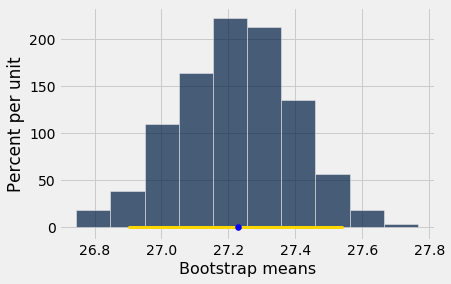

In [32]:
Table().with_column('Bootstrap means', bootstrap_means).hist()

plots.plot([left,right], [0,0], color="gold", lw=3, zorder=1);
plots.scatter(mean_age,0,color="blue", zorder=2);
plots.title('Bootstrap Means (1K Bootstraps from our Sample)');

## Bootstrap review: San Francisco City Salaries

In [ ]:
sf_pop = Table.read_table('san_francisco_2015.csv').where('Total Compensation', are.above(10000))
sf_pop = sf_pop.where('Total Compensation', are.above(10*40*52))
pop_median = percentile(50, sf_pop.column('Total Compensation'))
print("Population median is $", pop_median)

our_sample = sf_pop.sample(300, with_replacement = False)

In [ ]:
def one_bootstrap_median():
    single_sample = our_sample.sample()
    return percentile(50, single_sample.column('Total Compensation'))

med_bins = np.arange(90000, 125001, 2500)

In [ ]:
## Let's do the whole process, all at once: 
## 1. take a sample, 

our_sample = sf_pop.sample(300, with_replacement = False)
our_sample_median = percentile(50, our_sample.column('Total Compensation'))


## 2. use it to make many bootstrap samples,

bootstrap_medians = make_array()
for i in np.arange(201):
    new_median = one_bootstrap_median()
    bootstrap_medians = np.append(bootstrap_medians, new_median)


## 3. and use the middle 95% of the bootstrap medians as our confidence interval

left = percentile(2.5, bootstrap_medians)
right = percentile(97.5, bootstrap_medians)

Table().with_column('Bootstrap Medians', bootstrap_medians).hist('Bootstrap Medians', bins=med_bins)
plots.plot([left, right], [0,0], color="gold",lw=3, zorder=1);
plots.scatter(pop_median, 0, color="red", zorder=2);
plots.scatter(our_sample_median, 0, color="blue", zorder=2);

## Bootstrap Review: Mean Maternal Age

In [ ]:
births = Table.read_table('baby.csv')
births.show(5)

In [ ]:
births.hist('Maternal Age')

In [ ]:
mean_age = np.mean(births.column('Maternal Age'))
mean_age

In [ ]:
def one_bootstrap_mean():
    return np.mean(births.sample().column('Maternal Age'))

In [ ]:
bootstrap_means = make_array()

for i in np.arange(1000):
    new_mean = one_bootstrap_mean()
    bootstrap_means = np.append(bootstrap_means, new_mean)
    
left = percentile(2.5, bootstrap_means)
right = percentile(97.5, bootstrap_means)

In [ ]:
Table().with_column('Bootstrap means', bootstrap_means).hist()
plots.plot([left,right], [0,0], color="gold", lw=3, zorder=1);
plots.scatter(mean_age,0,color="blue", zorder=2);

## Average (Mean) ##

In [6]:
values = make_array(2, 3, 3, 9)

In [7]:
sum(values)/len(values)

4.25

In [8]:
np.average(values)

4.25

In [9]:
np.mean(values)

4.25

In [10]:
(2 + 3 + 3 + 9)/4

4.25

In [11]:
2*(1/4) + 3*(2/4) + 9*(1/4)

4.25

In [12]:
values_table = Table().with_columns('value', values)
values_table

value
2
3
3
9


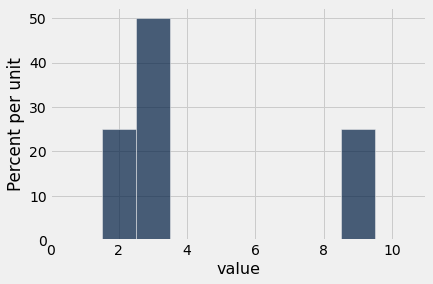

In [13]:
bins_for_display = np.arange(0.5, 10.6, 1)
values_table.hist(0, bins = bins_for_display)

In [14]:
## Make array of 10 2s, 20 3s, and 10 9s

new_vals = make_array(2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                      3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                      9, 9, 9, 9, 9, 9, 9, 9, 9, 9)

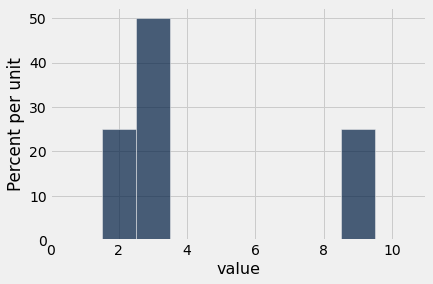

In [15]:
Table().with_column('value', new_vals).hist(bins = bins_for_display)

In [16]:
np.average(values)

4.25

In [17]:
np.average(new_vals)

4.25

### Discussion Question

In [2]:
nba = Table.read_table('nba2013.csv')
nba

Name,Position,Height,Weight,Age in 2013
DeQuan Jones,Guard,80,221,23
Darius Miller,Guard,80,235,23
Trevor Ariza,Guard,80,210,28
James Jones,Guard,80,215,32
Wesley Johnson,Guard,79,215,26
Klay Thompson,Guard,79,205,23
Thabo Sefolosha,Guard,79,215,29
Chase Budinger,Guard,79,218,25
Kevin Martin,Guard,79,185,30
Evan Fournier,Guard,79,206,20


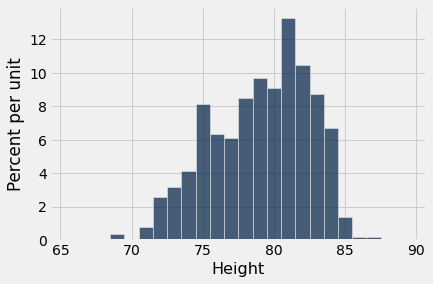

In [3]:
nba.hist('Height', bins=np.arange(65.5, 90.5))

In [4]:
heights = nba.column('Height')
percentile(50, heights)

80

In [5]:
np.average(heights)

79.06534653465347

## Standard Deviation ##

In [18]:
sd_table = Table().with_columns('Value', values)
sd_table

Value
2
3
3
9


In [19]:
average_value = np.average(sd_table.column(0))
average_value

4.25

In [20]:
deviations = values - average_value
sd_table = sd_table.with_column('Deviation', deviations)
sd_table

Value,Deviation
2,-2.25
3,-1.25
3,-1.25
9,4.75


In [21]:
sum(deviations)

0.0

In [22]:
sd_table = sd_table.with_columns('Squared Deviation', deviations ** 2)
sd_table

Value,Deviation,Squared Deviation
2,-2.25,5.0625
3,-1.25,1.5625
3,-1.25,1.5625
9,4.75,22.5625


In [23]:
# Variance of the data

variance = np.mean(sd_table.column('Squared Deviation'))
variance

7.6875

In [24]:
# Standard Deviation (SD) is the square root of the variance

sd = variance ** 0.5
sd

2.7726341266023544

In [25]:
np.std(values)

2.7726341266023544